In [26]:
import transformers
from transformers import AutoModel, AutoImageProcessor
from transformers import pipeline
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation, BaseImageProcessor
import numpy
import pathlib as pl
import PIL 
import datasets
import matplotlib.pyplot as plt
import numpy as np

In [18]:
model_path = pl.Path("/home/groups/dustinms/aashrayc/glacformer-training/glacformer/SherlockCluster--2024-10-04--10-45-59-/checkpoint-8800")
processor = SegformerForSemanticSegmentation.from_pretrained(model_path)
auto_proc = AutoImageProcessor.from_pretrained(model_path)
# base_proc = BaseImageProcessor(model_path / "preprocessor_config.json")
model = AutoModel.from_pretrained(model_path,local_files_only=True)
segmenter = pipeline("image-segmentation", model = model, image_processor = auto_proc, device_map = "auto")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
The model 'SegformerModel' is not supported for image-segmentation. Supported models are ['DetrForSegmentation', 'BeitForSemanticSegmentation', 'Data2VecVisionForSemanticSegmentation', 'DPTForSemanticSegmentation', 'MobileNetV2ForSemanticSegmentation', 'MobileViTForSemanticSegmentation', 'MobileViTV2ForSemanticSegmentation', 'SegformerForSemanticSegmentation', 'UperNetForSemanticSegmentation', 'MaskFormerForInstanceSegmentation', 'Mask2FormerForUniversalSegmentation', 'OneFormerForUniversalSegmentation'].


In [19]:
data_path = pl.Path("./inference_dataset/inference_dataset.hf/")
ds = datasets.load_from_disk(data_path)

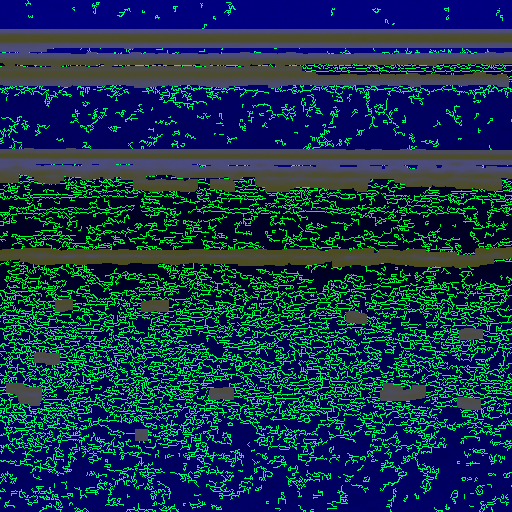

In [29]:
ds[0]["image"]

In [32]:
processor(np.array(ds[0]["image"]))

TypeError: conv2d() received an invalid combination of arguments - got (numpy.ndarray, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, tuple of ints padding = 0, tuple of ints dilation = 1, int groups = 1)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, !int!)
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, str padding = "valid", tuple of ints dilation = 1, int groups = 1)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, !int!)


In [ ]:
for i in ds:
    segments = segmenter(i)
    red = np.array(segments[0]["mask"].convert("L"))
    green = np.array(segments[2]["mask"].convert("L"))
    blue = np.array(segments[1]["mask"].convert("L"))
    combo = np.stack([red, green, blue])
    base = np.array(ds["pixel_values"].convert("L"))
    base = np.stack([base,base,base])
    blend = .5
    output = base * blend + combo * (1-blend)
    plt.imshow(output)
    plt.show()    